# EDA

- **Age** - Age of the patient
- **Gender** - Gender of the patient (1-Male, 0-Female)
- **Heart Rate** - Heart rate of the patient
- **Blood Pressure** - Blood pressure of the patient (systolic and diastolic)
- **Blood Sugar** - Blood sugar levels of the patient
- **CK-MB** - Concentration of the CK-MB biomarker
- **Troponin** - Concentration of the Troponin biomarker
- **Result** - Diagnostic outcome for the patient (1-Heart Attack, 0-No Heart Attack)

## Imports

In [133]:
import warnings

import pandas as pd
import seaborn as sns

warnings.filterwarnings("ignore")

In [134]:
# auto reload libs
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Paths

In [135]:
DATASET = "../data/Medicaldataset.csv"

## Load Data

In [136]:
df = pd.read_csv(DATASET)
df.head()

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
0,63,1,66,160,83,160.0,1.80,0.012,negative
1,20,1,94,98,46,296.0,6.75,1.060,positive
2,56,1,64,160,77,270.0,1.99,0.003,negative
3,66,1,70,120,55,270.0,13.87,0.122,positive
4,54,1,64,112,65,300.0,1.08,0.003,negative


In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1319 non-null   int64  
 1   Gender                    1319 non-null   int64  
 2   Heart rate                1319 non-null   int64  
 3   Systolic blood pressure   1319 non-null   int64  
 4   Diastolic blood pressure  1319 non-null   int64  
 5   Blood sugar               1319 non-null   float64
 6   CK-MB                     1319 non-null   float64
 7   Troponin                  1319 non-null   float64
 8   Result                    1319 non-null   object 
dtypes: float64(3), int64(5), object(1)
memory usage: 92.9+ KB


In [138]:
df.describe()

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin
count,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000
mean,56.193328,0.659591,78.336619,127.170584,72.269143,146.634344,15.274306,0.360942
std,13.638173,0.474027,51.630270,26.122720,14.033924,74.923045,46.327083,1.154568
min,14.000000,0.000000,20.000000,42.000000,38.000000,35.000000,0.321000,0.001000
25%,47.000000,0.000000,64.000000,110.000000,62.000000,98.000000,1.655000,0.006000
50%,58.000000,1.000000,74.000000,124.000000,72.000000,116.000000,2.850000,0.014000
75%,65.000000,1.000000,85.000000,143.000000,81.000000,169.500000,5.805000,0.085500
max,103.000000,1.000000,1111.000000,223.000000,154.000000,541.000000,300.000000,10.300000


In [139]:
df.isna().sum()

Age                         0
Gender                      0
Heart rate                  0
Systolic blood pressure     0
Diastolic blood pressure    0
Blood sugar                 0
CK-MB                       0
Troponin                    0
Result                      0
dtype: int64

In [140]:
df.isnull().sum()

Age                         0
Gender                      0
Heart rate                  0
Systolic blood pressure     0
Diastolic blood pressure    0
Blood sugar                 0
CK-MB                       0
Troponin                    0
Result                      0
dtype: int64

In [141]:
df.Result = df.Result.map({"negative": 0, "positive": 1})

In [142]:
df.Result[:10]

0    0
1    1
2    0
3    1
4    0
5    0
6    0
7    1
8    0
9    0
Name: Result, dtype: int64

## Visualizations

### Age

In [143]:
df.Age.describe()

count    1319.000000
mean       56.193328
std        13.638173
min        14.000000
25%        47.000000
50%        58.000000
75%        65.000000
max       103.000000
Name: Age, dtype: float64

<Axes: xlabel='Age', ylabel='Count'>

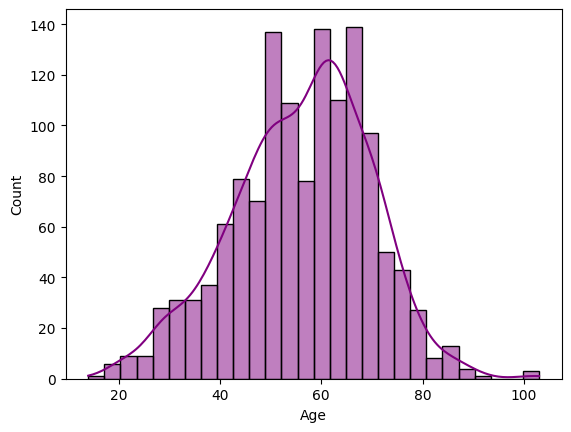

In [144]:
sns.histplot(df["Age"], kde=True, color="purple")

<Axes: xlabel='Age', ylabel='Count'>

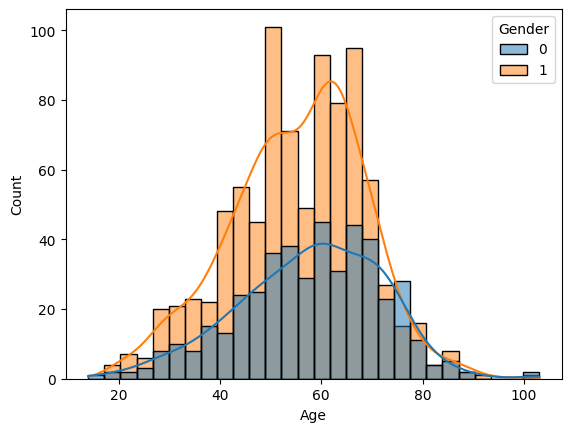

In [145]:
sns.histplot(df, x="Age", hue="Gender", kde=True)

In [146]:
df.Gender.value_counts()

Gender
1    870
0    449
Name: count, dtype: int64

### Stress level at different Age with Sex

In [147]:
df["age_group"] = pd.cut(
    df["Age"],
    bins=[18, 27, 36, 45, 54, 63, 72, 81, 90],
    labels=["18-27", "27-36", "36-45", "45-54", "54-63", "63-72", "72-81", "81-90"],
)
df["age_group"][:5]

0    54-63
1    18-27
2    54-63
3    63-72
4    45-54
Name: age_group, dtype: category
Categories (8, object): ['18-27' < '27-36' < '36-45' < '45-54' < '54-63' < '63-72' < '72-81' < '81-90']

### Heart Attack Risk vs Sex

<Axes: xlabel='Result', ylabel='Count'>

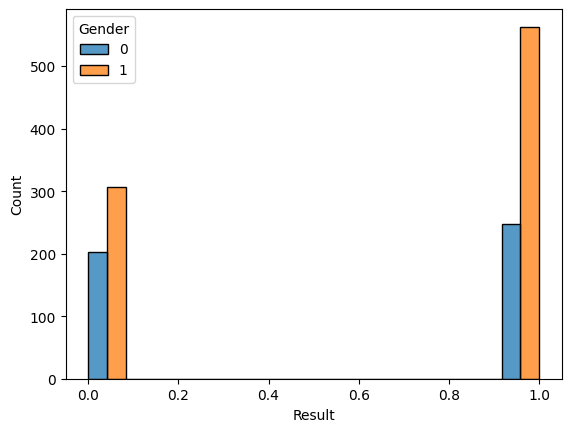

In [148]:
sns.histplot(data=df, hue="Gender", x="Result", multiple="dodge")

In [149]:
df.Result.value_counts()

Result
1    810
0    509
Name: count, dtype: int64

### Blood sugar vs Heart Attack Risk

<Axes: xlabel='Blood sugar', ylabel='Count'>

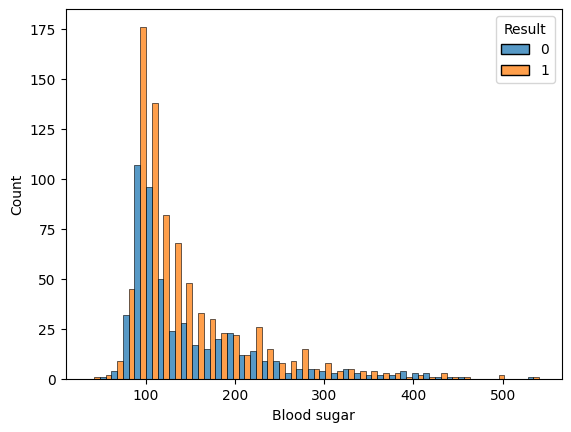

In [150]:
sns.histplot(df, x="Blood sugar", hue="Result", multiple="dodge")

<Axes: xlabel='Heart rate', ylabel='Count'>

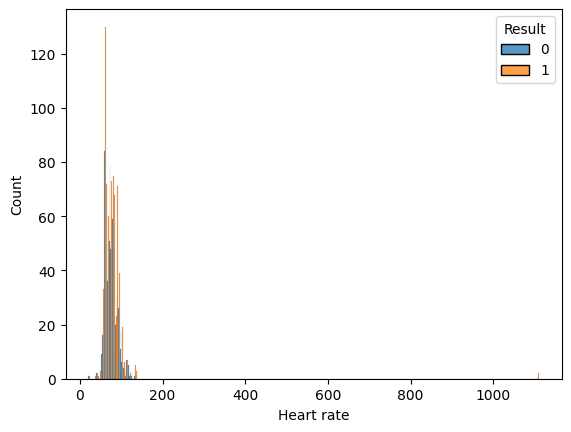

In [151]:
sns.histplot(df, x="Heart rate", hue="Result", multiple="dodge")

In [152]:
df[df["Heart rate"] > 200]

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result,age_group
63,45,1,1111,141,95,109.0,1.33,1.010,1,36-45
717,70,0,1111,141,95,138.0,3.87,0.028,1,63-72
1069,32,0,1111,141,95,82.0,2.66,0.008,0,27-36


In [153]:
df.drop(df[df["Heart rate"] > 200].index, inplace=True)

In [154]:
df[df["Heart rate"] > 200]

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result,age_group


In [155]:
df.describe()

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
count,1316.000000,1316.000000,1316.000000,1316.000000,1316.000000,1316.000000,1316.000000,1316.000000,1316.000000
mean,56.209726,0.660334,75.982523,127.139058,72.217325,146.718617,15.303153,0.360970,0.613982
std,13.628591,0.473776,15.276877,26.144139,14.007815,74.979672,46.375924,1.155668,0.487020
min,14.000000,0.000000,20.000000,42.000000,38.000000,35.000000,0.321000,0.001000,0.000000
25%,47.000000,0.000000,64.000000,110.000000,62.000000,98.000000,1.657500,0.006000,0.000000
50%,58.000000,1.000000,74.000000,124.000000,72.000000,116.000000,2.850000,0.014000,1.000000
75%,65.000000,1.000000,85.000000,143.000000,81.000000,170.000000,5.812500,0.085250,1.000000
max,103.000000,1.000000,135.000000,223.000000,154.000000,541.000000,300.000000,10.300000,1.000000


<Axes: xlabel='Systolic blood pressure', ylabel='Count'>

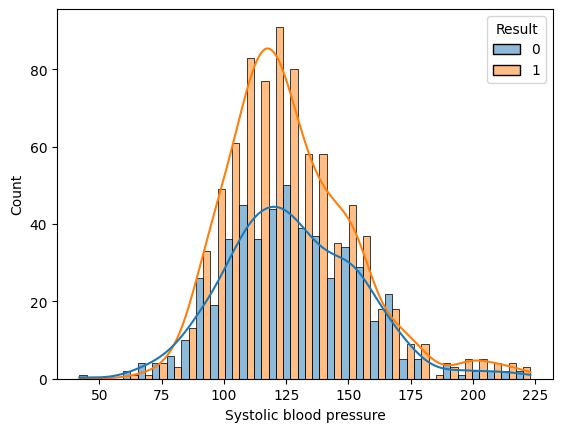

In [118]:
sns.histplot(df, x="Systolic blood pressure", hue="Result", multiple="dodge", kde=True)

<Axes: xlabel='Diastolic blood pressure', ylabel='Count'>

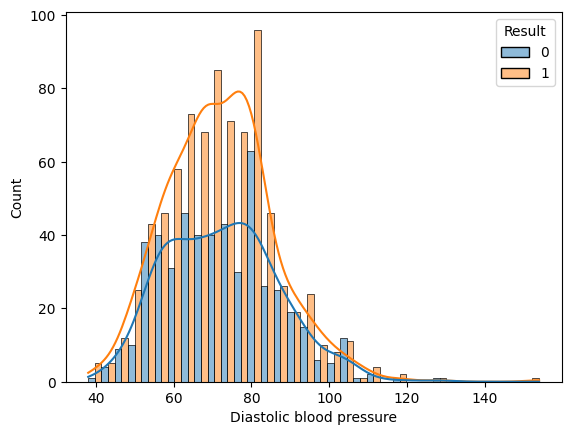

In [119]:
sns.histplot(df, x="Diastolic blood pressure", hue="Result", multiple="dodge", kde=True)

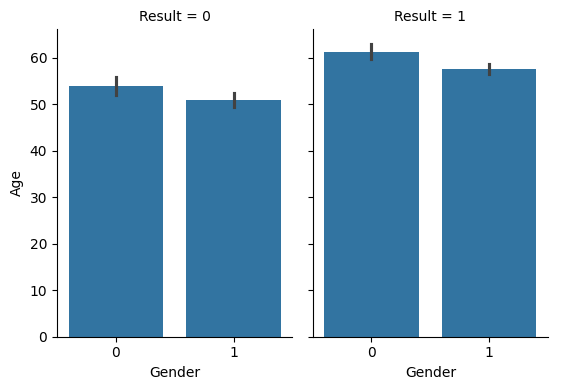

In [126]:
sns.catplot(data=df, x="Gender", y="Age", col="Result", kind="bar", height=4, aspect=0.7)

## Correlation

In [127]:
temp_df = df.copy()

In [128]:
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1316 entries, 0 to 1318
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Age                       1316 non-null   int64   
 1   Gender                    1316 non-null   int64   
 2   Heart rate                1316 non-null   int64   
 3   Systolic blood pressure   1316 non-null   int64   
 4   Diastolic blood pressure  1316 non-null   int64   
 5   Blood sugar               1316 non-null   float64 
 6   CK-MB                     1316 non-null   float64 
 7   Troponin                  1316 non-null   float64 
 8   Result                    1316 non-null   int64   
 9   age_group                 1311 non-null   category
dtypes: category(1), float64(3), int64(6)
memory usage: 104.5 KB


In [130]:
temp_df.drop(["age_group"], axis=1, inplace=True)

In [131]:
corr_matrix = temp_df.corr()
corr_matrix["Result"].sort_values(ascending=False)

Result                      1.000000
Age                         0.236881
Troponin                    0.229210
CK-MB                       0.218043
Gender                      0.093764
Heart rate                  0.006758
Diastolic blood pressure   -0.010099
Systolic blood pressure    -0.020985
Blood sugar                -0.033562
Name: Result, dtype: float64

why Age, Sex, Familiy History, Stress Level correlation are lower ??


<Axes: >

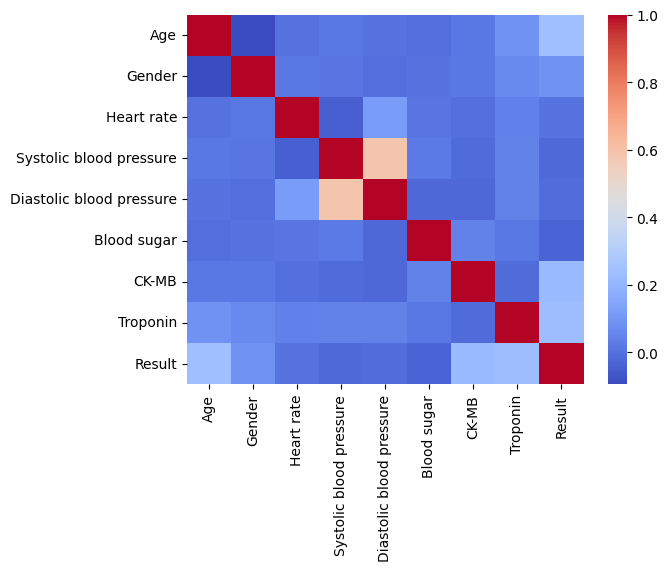

In [132]:
sns.heatmap(corr_matrix, annot=False, cmap="coolwarm")